In [1]:
import numpy as np
import pandas as pd
from features import check_data_quality, generate_features, plot_feature_distributions

In [2]:
df = pd.read_parquet("lapd_offenses_victims_merged.parquet")
df

,caseno,uniquenibrno,date_rptd,date_occ,time_occ,area_name,rpt_dist_no,totaloffensecount,group,nibr_description,...,gang_related_crime,transit_related_crime,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,uniquevictimno,vict_age,vict_descent,vict_sex,victim_type
0,25071666,25071666_13B_0,2025-04-23,2025-04-23,08:55:00,Hollywood,638,1,A,242 - PC - M - Battery On Person - Simple - 13B,...,False,True,False,False,False,25071666_0,52,Hispanic,F,Person
1,25193121,25193121_23G_0,2025-10-13,2025-10-11,17:00:00,Van Nuys,939,1,A,459 - PC - F - BFMV - Theft Of Motor Vehicle P...,...,False,False,False,False,False,25193121_0,20,White/Caucasian,F,Person
2,24088556,24088556_13B_0,2024-11-22,2024-11-22,21:00:00,West Valley,1018,2,A,243(E)(1) - PC - M - Intimate Partner Battery ...,...,False,False,False,False,False,24088556_0,41,Other Asian,F,Person
3,25087123,25087123_13B_0,2025-05-14,2025-05-13,20:00:00,Devonshire,1799,1,A,243(A) - PC - M - Battery On Person - Simple -...,...,False,False,False,False,False,25087123_0,59,Filipino,F,Person
4,25188446,25188446_240_0,2025-10-07,2025-10-07,07:50:00,Hollenbeck,497,1,A,487(D)(1) - PC - M - Grand Theft - Auto - Moto...,...,False,False,False,False,False,25188446_0,60,Hispanic,M,Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243634,25186004,25186004_240_0,2025-10-03,2025-10-02,19:00:00,N Hollywood,1517,1,A,487(D)(1) - PC - F - Grand Theft Auto - GTA -...,...,False,False,False,False,False,25186004_0,31,Hispanic,F,Person
243635,C259038857,C259038857_23C_0,2025-09-28,2025-09-26,18:41:00,Topanga,2156,1,A,459.5(A) - PC - M - Petty Theft - Shoplifting ...,...,False,False,False,False,False,C259038857_0,<NA>,None,None,Business
243636,25100411,25100411_13B_0,2025-06-01,2025-06-01,03:00:00,Central,135,1,A,273.5(A) - PC - F - IPV w/ Injury - Simple Ass...,...,False,False,True,False,False,25100411_0,58,White/Caucasian,F,Person
243637,C259039429,C259039429_290_0,2025-09-16,2025-09-16,06:44:00,Devonshire,1728,1,A,594(B)(2)(A) - PC - M - Vandalism Less Than $4...,...,False,False,False,False,False,C259039429_0,64,White/Caucasian,F,Person


In [3]:
df_features = generate_features(df)
df_features

,area_name,totaloffensecount,group,nibr_description,crime_against,premis_desc,weapon_desc,status_desc,totalvictimcount,victim_shot,...,transit_related_crime,homeless_victim_crime,homeless_suspect_crime,homeless_arrestee_crime,vict_age,vict_descent,vict_sex,victim_type,month,is_weekend
0,Hollywood,1,A,242 - PC - M - Battery On Person - Simple - 13B,Person,Other,"Bodily Force - Personal Weapons (hands, feet, ...",Investigation Continued,1,0,...,1,0,0,0,45-60,Hispanic,F,Person,4,0
1,Van Nuys,1,A,Other,Property,Street/Parkway,Missing,Investigation Continued,1,0,...,0,0,0,0,18-30,White/Caucasian,F,Person,10,1
2,West Valley,2,A,243(E)(1) - PC - M - Intimate Partner Battery ...,Person,Single Family Home,Other,Cleared by Arrest,1,0,...,0,0,0,0,30-45,Other Asian,F,Person,11,0
3,Devonshire,1,A,243(A) - PC - M - Battery On Person - Simple -...,Person,Single Family Home,Other,Cleared Other,1,0,...,0,0,0,0,45-60,Other,F,Person,5,0
4,Hollenbeck,1,A,Other,Property,Street/Parkway,Missing,Investigation Continued,1,0,...,0,0,0,0,60-75,Hispanic,M,Person,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243634,N Hollywood,1,A,487(D)(1) - PC - F - Grand Theft Auto - GTA -...,Property,Street/Parkway,Missing,Investigation Continued,1,0,...,0,0,0,0,30-45,Hispanic,F,Person,10,0
243635,Topanga,1,A,459.5(A) - PC - M - Petty Theft - Shoplifting ...,Property,Other,Missing,Other,1,0,...,0,0,0,0,Missing,Missing,Other,Business,9,0
243636,Central,1,A,273.5(A) - PC - F - IPV w/ Injury - Simple Ass...,Person,Street/Parkway,"Bodily Force - Personal Weapons (hands, feet, ...",Investigation Continued,1,0,...,0,1,0,0,45-60,White/Caucasian,F,Person,6,1
243637,Devonshire,1,A,594(B)(2)(A) - PC - M - Vandalism Less Than $4...,Property,Residence / Home / Driveway,Missing,Investigation Continued,1,0,...,0,0,0,0,60-75,White/Caucasian,F,Person,9,0


In [4]:
print("Feature Data Types:")
print(df_features.dtypes)
print("\n")
print("Summary:")
print(f"Total columns: {len(df_features.columns)}")
print(f"Categorical columns: {df_features.select_dtypes(include=['category']).shape[1]}")
print(f"Numeric columns: {df_features.select_dtypes(include=[np.number]).shape[1]}")
print(f"Boolean columns: {df_features.select_dtypes(include=['bool']).shape[1]}")

Feature Data Types:
area_name                  category
totaloffensecount          category
group                      category
nibr_description           category
crime_against              category
premis_desc                category
weapon_desc                category
status_desc                category
totalvictimcount           category
victim_shot                   int64
domestic_violence_crime       int64
hate_crime                    int64
gang_related_crime            int64
transit_related_crime         int64
homeless_victim_crime         int64
homeless_suspect_crime        int64
homeless_arrestee_crime       int64
vict_age                   category
vict_descent               category
vict_sex                   category
victim_type                category
month                         int32
is_weekend                    int64
dtype: object


Summary:
Total columns: 23
Categorical columns: 13
Numeric columns: 10
Boolean columns: 0


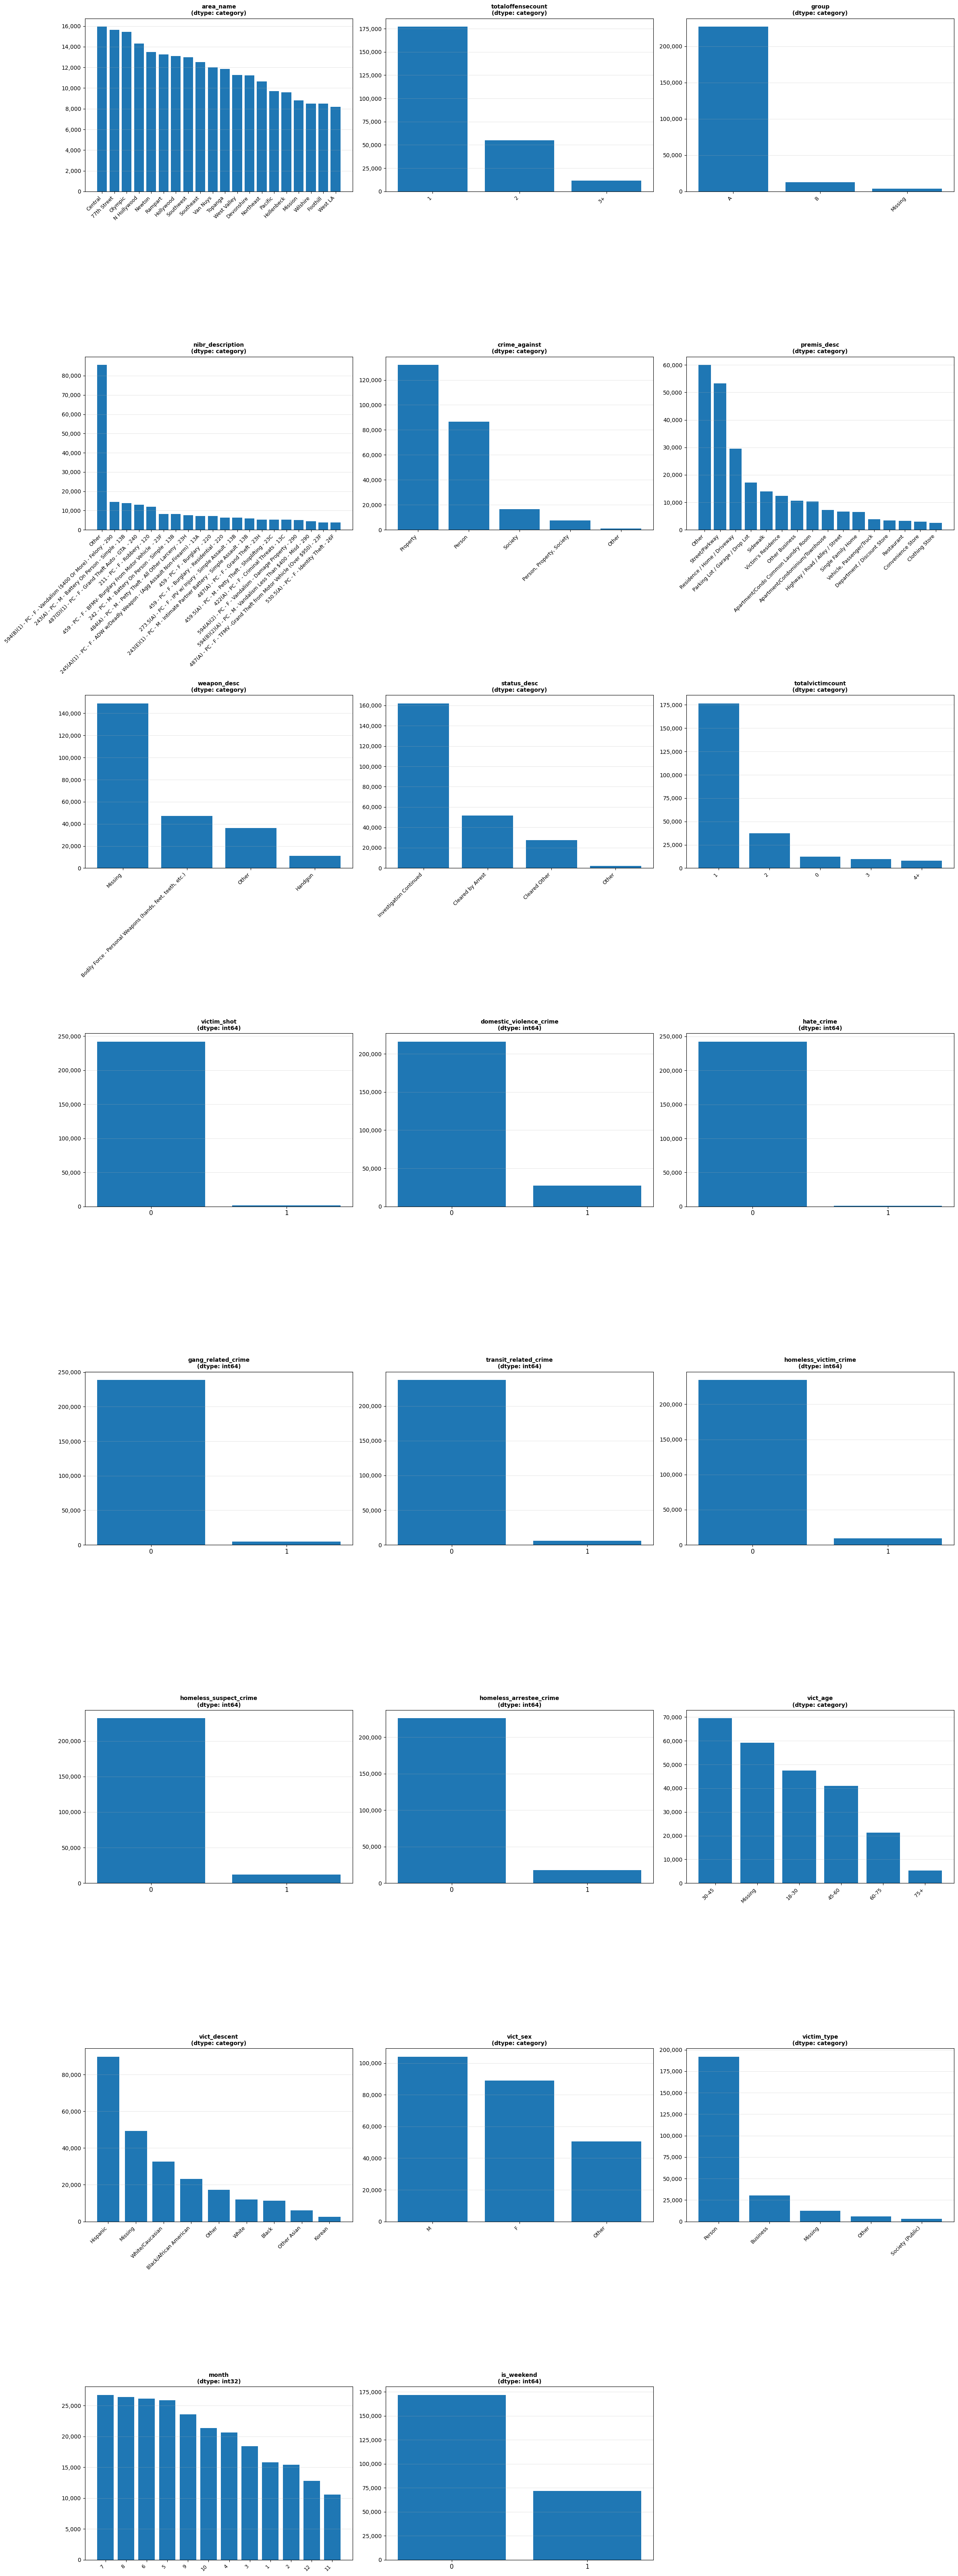

In [5]:
plot_feature_distributions(df_features)

In [7]:
quality_report = check_data_quality(df_features)

DATA QUALITY REPORT

Total rows: 243639
Total columns: 23

Is Balanced: True

NaN Summary:
------------------------------------------------------------
area_name                      | NaN:      0 ( 0.00%) | Non-NaN: 243639
totaloffensecount              | NaN:      0 ( 0.00%) | Non-NaN: 243639
group                          | NaN:      0 ( 0.00%) | Non-NaN: 243639
nibr_description               | NaN:      0 ( 0.00%) | Non-NaN: 243639
crime_against                  | NaN:      0 ( 0.00%) | Non-NaN: 243639
premis_desc                    | NaN:      0 ( 0.00%) | Non-NaN: 243639
weapon_desc                    | NaN:      0 ( 0.00%) | Non-NaN: 243639
status_desc                    | NaN:      0 ( 0.00%) | Non-NaN: 243639
totalvictimcount               | NaN:      0 ( 0.00%) | Non-NaN: 243639
victim_shot                    | NaN:      0 ( 0.00%) | Non-NaN: 243639
domestic_violence_crime        | NaN:      0 ( 0.00%) | Non-NaN: 243639
hate_crime                     | NaN:      0 ( 0.00%) | 